# <div style="text-align: right"> Chapter __12__</div>

# __Factors with forcats__

In [1]:
# config
repr_html.tbl_df <- function(obj, ..., rows = 6) repr:::repr_html.data.frame(obj, ..., rows = rows)
options(dplyr.summarise.inform = FALSE)

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## __Creating Factors__

To create a factor
you must start by creating a list of the valid levels:

In [3]:
month_levels <- c(
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
)

In [4]:
x1 <- c("Dec", "Apr", "Jan", "Mar")
x2 <- c("Dec", "Apr", "Jam", "Mar")

In [5]:
y1 <- factor(x1, levels = month_levels)

In [6]:
y1

[1] Dec Apr Jan Mar
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

In [7]:
sort(y1)

[1] Jan Mar Apr Dec
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

And any values not in the set will be silently converted to NA:

In [8]:
y2 <- parse_factor(x2, levels = month_levels)
y2

Warning message:
“1 parsing failure.
row col           expected actual
  3  -- value in level set    Jam
”


[1] Dec  Apr  <NA> Mar 
attr(,"problems")
# A tibble: 1 x 4
    row   col expected           actual
  <int> <int> <chr>              <chr> 
1     3    NA value in level set Jam   
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

If you omit the levels, they’ll be taken from the data in alphabetical
order:

In [9]:
factor(x1)

[1] Dec Apr Jan Mar
Levels: Apr Dec Jan Mar

Sometimes you’d prefer that the order of the levels match the order
of the first appearance in the data. You can do that when creating the
factor by setting levels to `unique(x)` , or after the fact, with `fct_inorder()` :

In [10]:
f1 <- factor(x1, levels = unique(x1))

In [11]:
f1

[1] Dec Apr Jan Mar
Levels: Dec Apr Jan Mar

In [12]:
f2 <- x1 %>%
    factor() %>%
    fct_inorder()

f2

[1] Dec Apr Jan Mar
Levels: Dec Apr Jan Mar

If you ever need to access the set of valid levels directly, you can do
so with `levels()` :

## __General Social Survey__

In [13]:
gss_cat

year,marital,age,race,rincome,partyid,relig,denom,tvhours
<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
2000,Never married,26,White,$8000 to 9999,"Ind,near rep",Protestant,Southern baptist,12
2000,Divorced,48,White,$8000 to 9999,Not str republican,Protestant,Baptist-dk which,NA
2000,Widowed,67,White,Not applicable,Independent,Protestant,No denomination,2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2014,Never married,24,White,$10000 - 14999,"Ind,near dem",None,Not applicable,4
2014,Never married,27,White,$25000 or more,Not str democrat,Catholic,Not applicable,NA
2014,Widowed,71,White,$20000 - 24999,"Ind,near rep",Protestant,Other,2


When factors are stored in a tibble, you can’t see their levels so
easily. One way to see them is with `count()`

In [14]:
gss_cat %>%
    count(race)

race,n
<fct>,<int>
Other,1959
Black,3129
White,16395


Or with a bar chart:

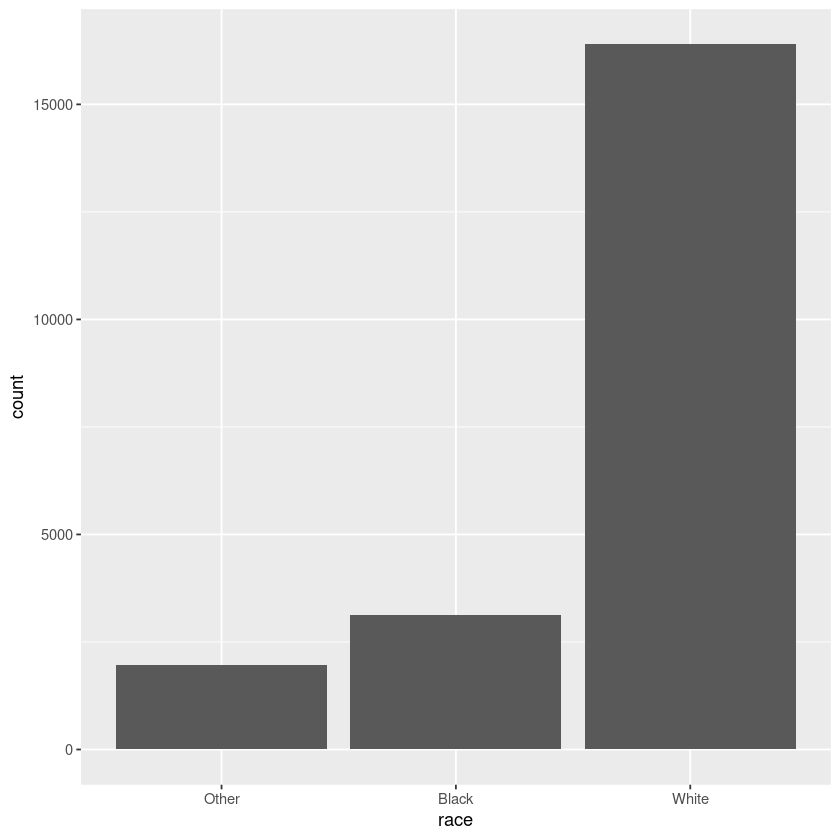

In [15]:
ggplot(gss_cat, aes(race)) +
    geom_bar()

By default, ggplot2 will drop levels that don’t have any values. You
can force them to display with:

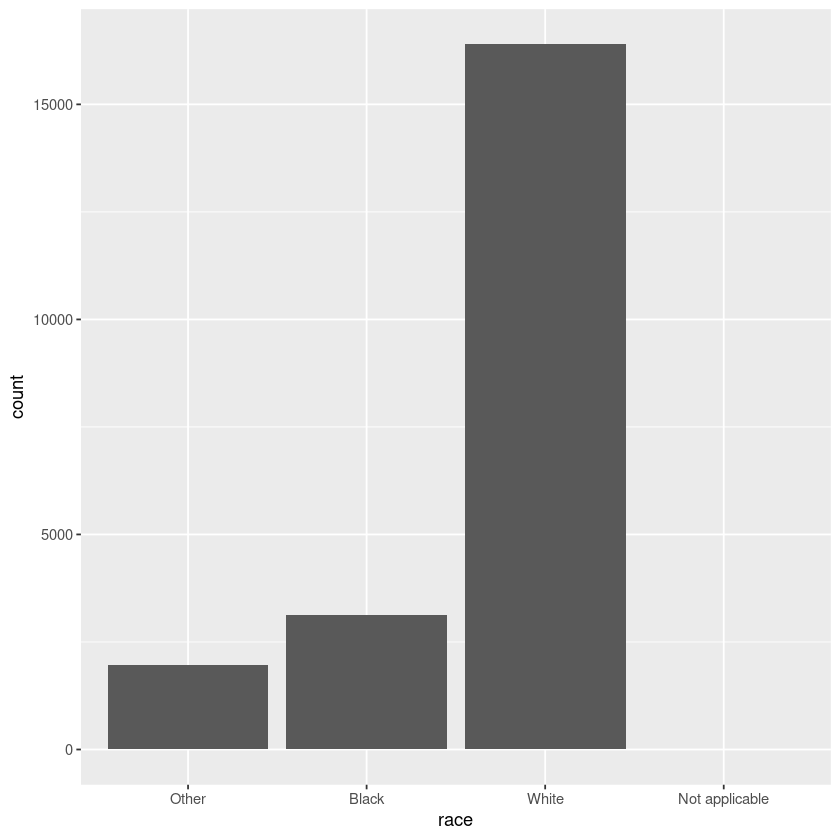

In [16]:
ggplot(gss_cat, aes(race)) +
    geom_bar() +
    scale_x_discrete(drop = FALSE)

Explore the distribution of rincome (reported income). What
makes the default bar chart hard to understand? How could you
improve the plot?

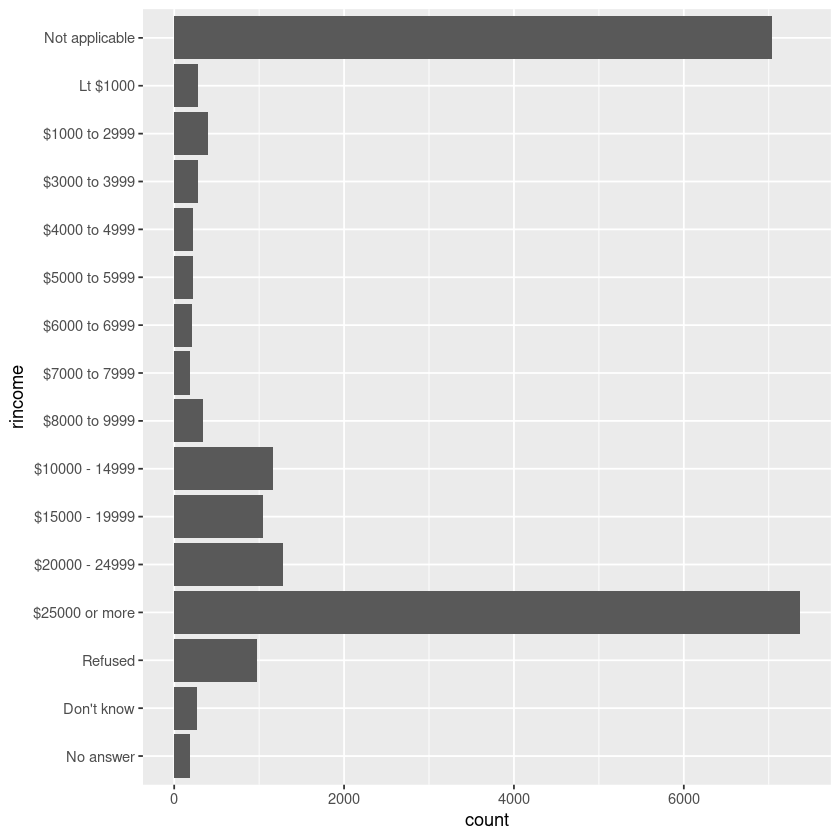

In [17]:
ggplot(gss_cat, aes(rincome)) +
    geom_bar() +
    coord_flip()

What is the most common relig in this survey? What’s the
most common partyid ?

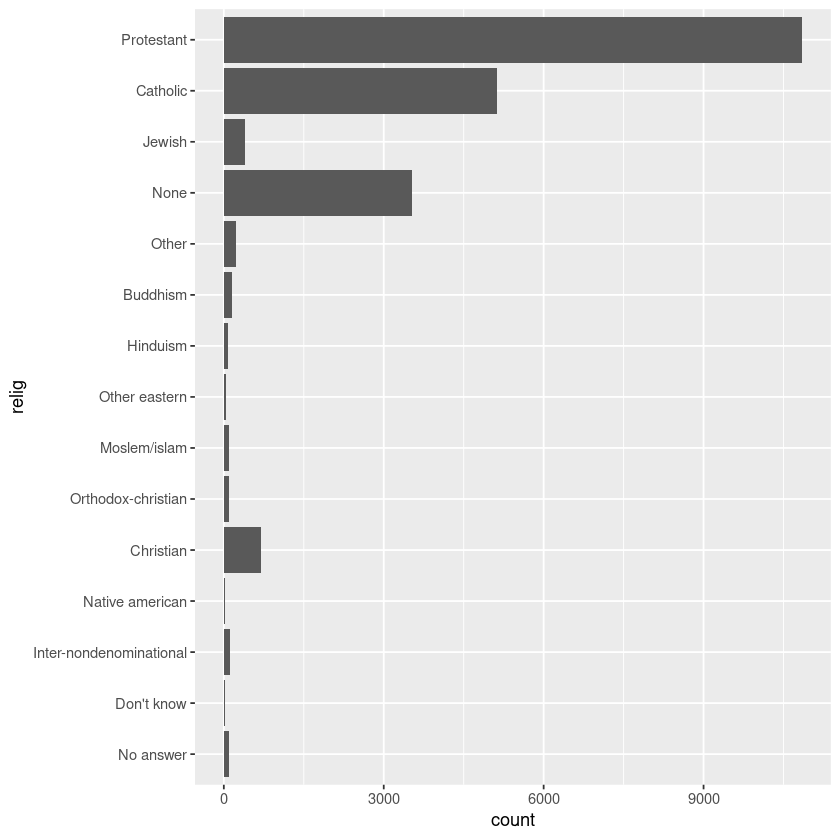

In [18]:
ggplot(gss_cat) +
    geom_bar(aes(relig)) +
    coord_flip()

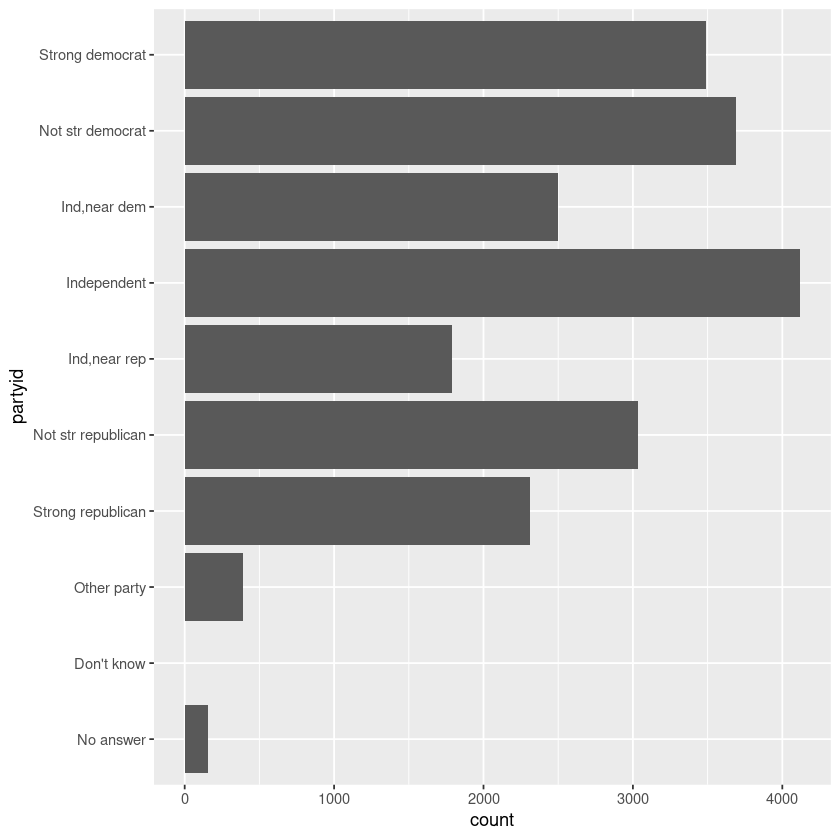

In [19]:
ggplot(gss_cat) +
    geom_bar(aes(partyid)) +
    coord_flip()

Which relig does denom (denomination) apply to? How can
you find out with a table? How can you find out with a visualization?

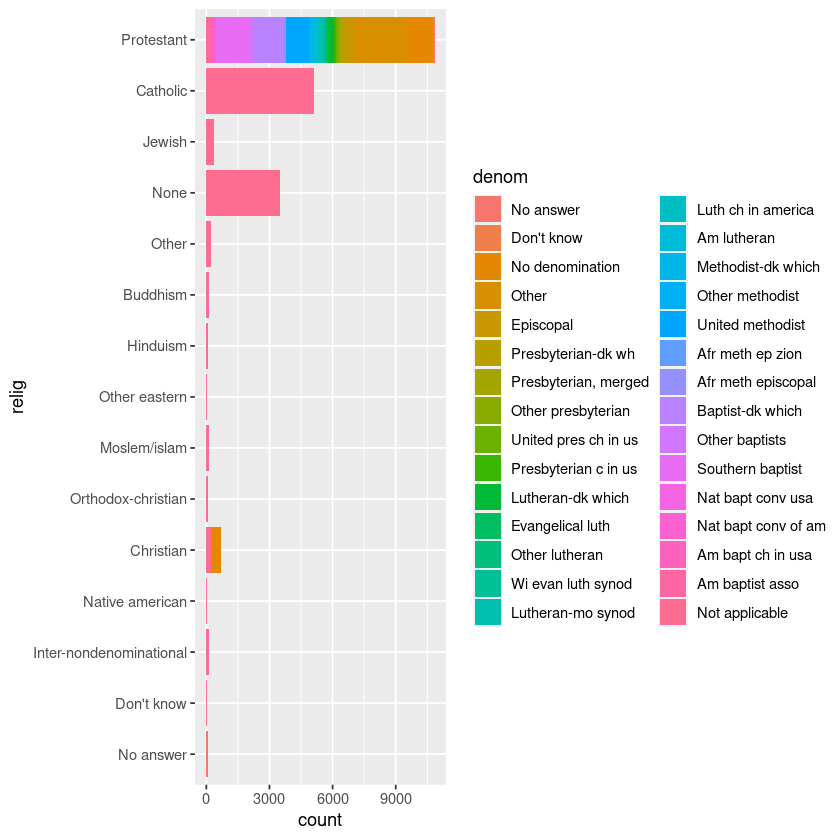

In [20]:
ggplot(gss_cat) +
    geom_bar(aes(relig,
                 fill = denom)) +
    coord_flip()

## __Modifying Factor Order__

It’s often useful to change the order of the factor levels in a visualiza‐
tion. For example, imagine you want to explore the average number
of hours spent watching TV per day across religions:

In [21]:
relig <- gss_cat %>%
    group_by(relig) %>%
    summarize(age = mean(age, na.rm = TRUE),
              tv_hours = mean(tvhours, na.rm = TRUE),
             b = n())

relig

relig,age,tv_hours,b
<fct>,<dbl>,<dbl>,<int>
No answer,49.49412,2.723404,93
Don't know,35.93333,4.625000,15
Inter-nondenominational,39.96330,2.870370,109
⋮,⋮,⋮,⋮
Jewish,52.39535,2.518519,388
Catholic,46.90825,2.960297,5124
Protestant,49.90422,3.145487,10846


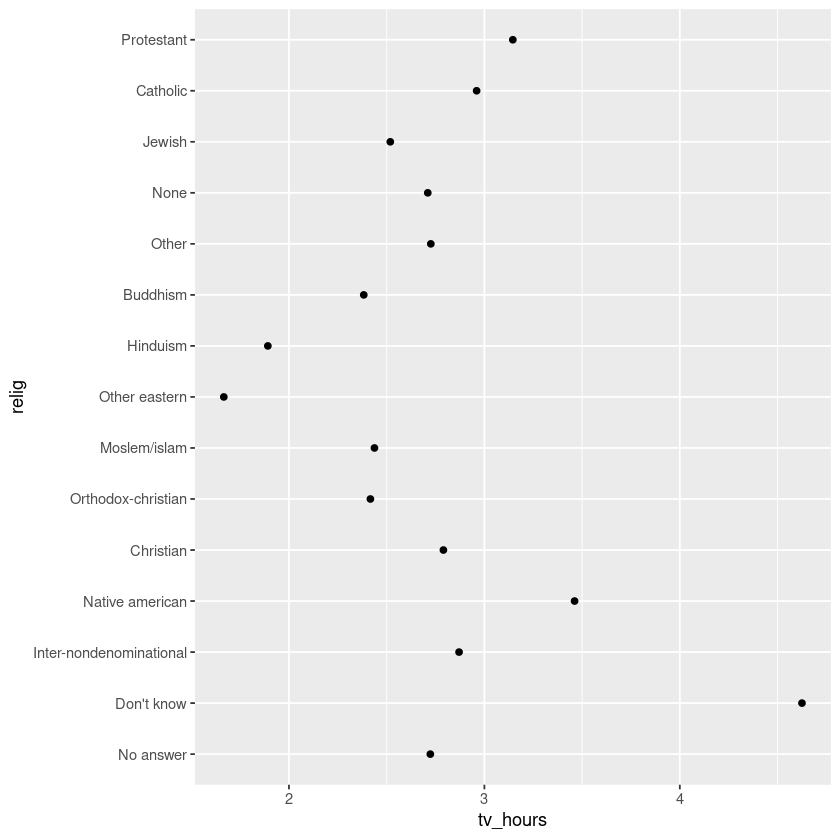

In [22]:
ggplot(relig,
       aes(tv_hours, relig)) +
    geom_point()

It is difficult to interpret this plot because there’s no overall pattern.
We can improve it by reordering the levels of relig using `fct_reorder()`.
`fct_reorder()` takes three arguments:

* f , the factor whose levels you want to modify.
* x , a numeric vector that you want to use to reorder the levels.
* Optionally, fun , a function that’s used if there are multiple val‐
ues of x for each value of f . The default value is median .

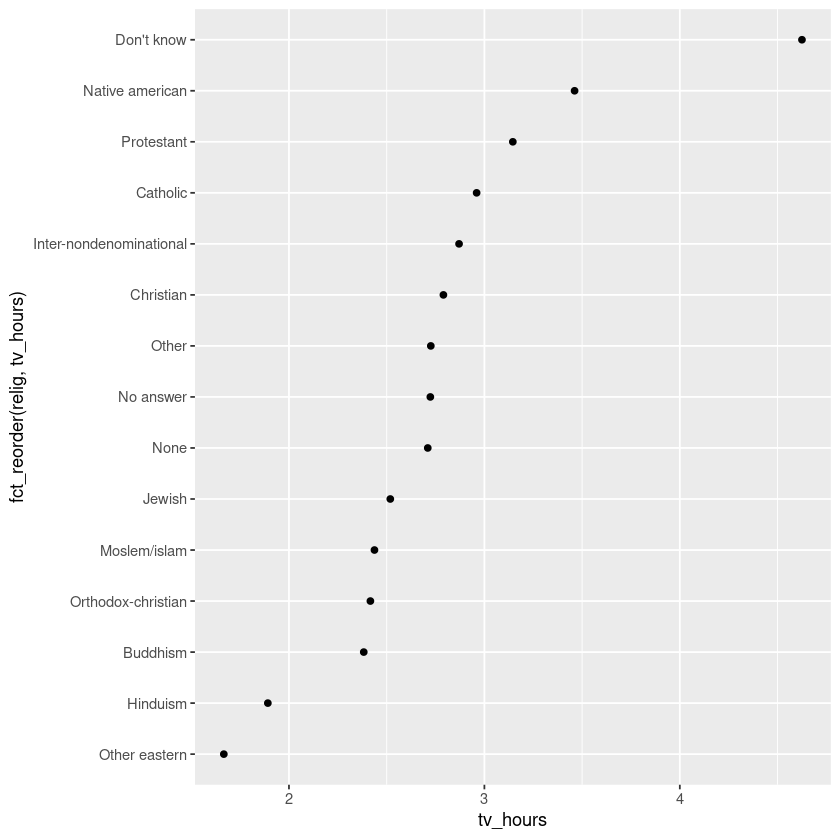

In [23]:
ggplot(relig, aes(tv_hours,
                  fct_reorder(relig, tv_hours))) +
    geom_point()

Reordering religion makes it much easier to see that people in the
“Don’t know” category watch much more TV, and Hinduism and
other Eastern religions watch much less.

plot looking at how average age varies
across reported income level?

In [24]:
rincome <- gss_cat %>%
    group_by(rincome) %>%
    summarize(
        age = mean(age, na.rm = TRUE),
        tv_hours = mean(tvhours, na.rm = TRUE),
        n = n()
    )

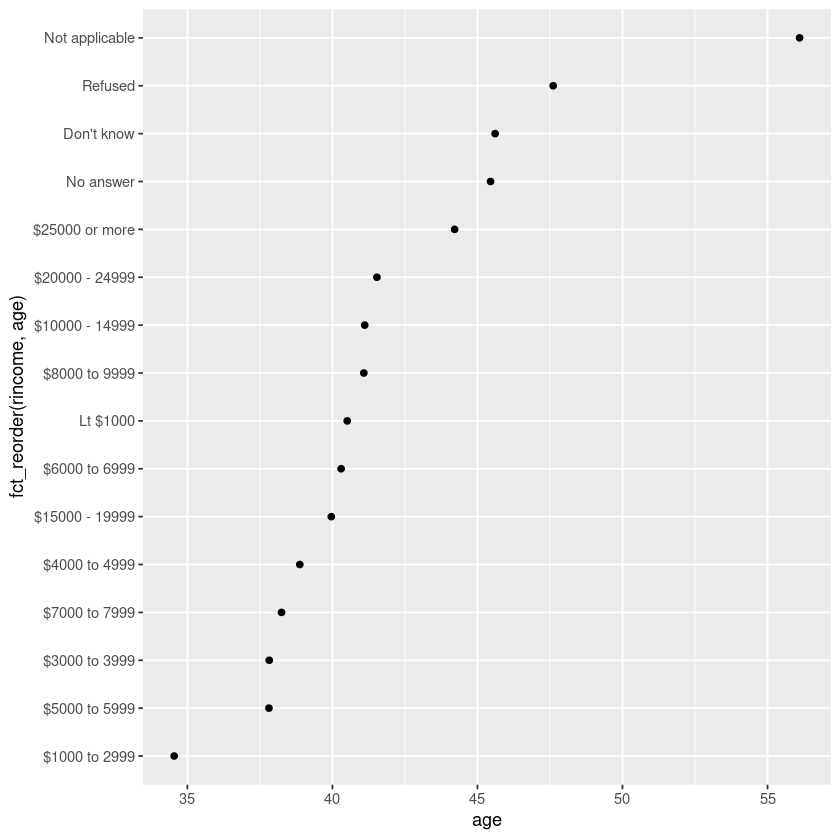

In [25]:
ggplot(rincome,
       aes(age, fct_reorder(rincome, age))) +
    geom_point()

Here, arbitrarily reordering the levels isn’t a good idea! That’s
because rincome already has a principled order that we shouldn’t
mess with. Reserve `fct_reorder()` for factors whose levels are arbitrarily ordered.

However, it does make sense to pull “Not applicable” to the front
with the other special levels. You can use `fct_relevel()` . It takes a
factor, f , and then any number of levels that you want to move to
the front of the line:

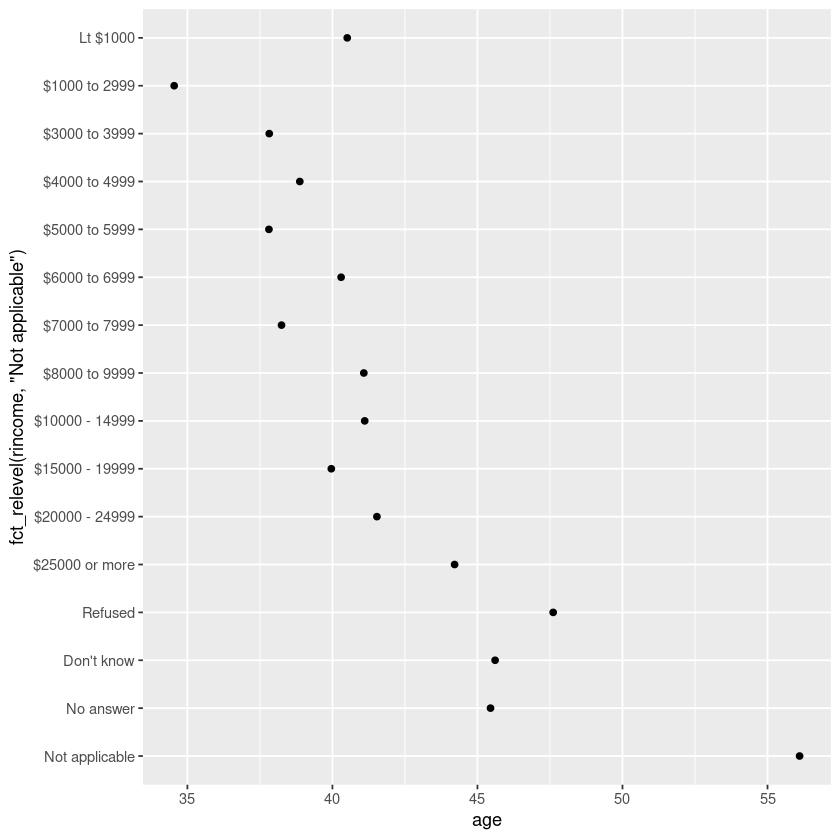

In [26]:
ggplot(rincome,
       aes(age, fct_relevel(rincome, 'Not applicable'))) +
    geom_point()

Another type of reordering is useful when you are coloring the lines
on a plot. `fct_reorder2()` reorders the factor by the y values associated with the largest x values. This makes the plot easier to read
because the line colors line up with the legend:

In [27]:
by_age <- gss_cat %>%
    filter(!is.na(age)) %>%
    group_by(age, marital) %>%
    count() %>%
    ungroup() %>%
    mutate(prop = as.numeric(n) / sum(n))

In [28]:
by_age

age,marital,n,prop
<int>,<fct>,<int>,<dbl>
18,Never married,89,4.157519e-03
18,Married,2,9.342738e-05
19,Never married,234,1.093100e-02
⋮,⋮,⋮,⋮
89,Divorced,9,0.0004204232
89,Widowed,108,0.0050450787
89,Married,25,0.0011678423


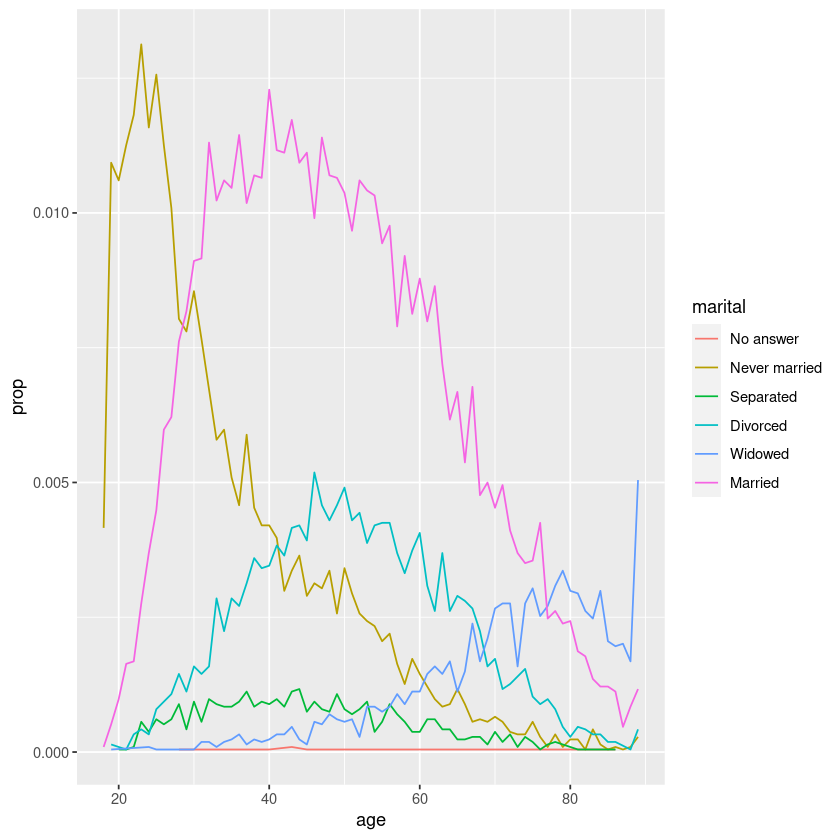

In [29]:
ggplot(by_age,
       aes(age, prop, color = marital)) +
    geom_line(na.rm = TRUE)

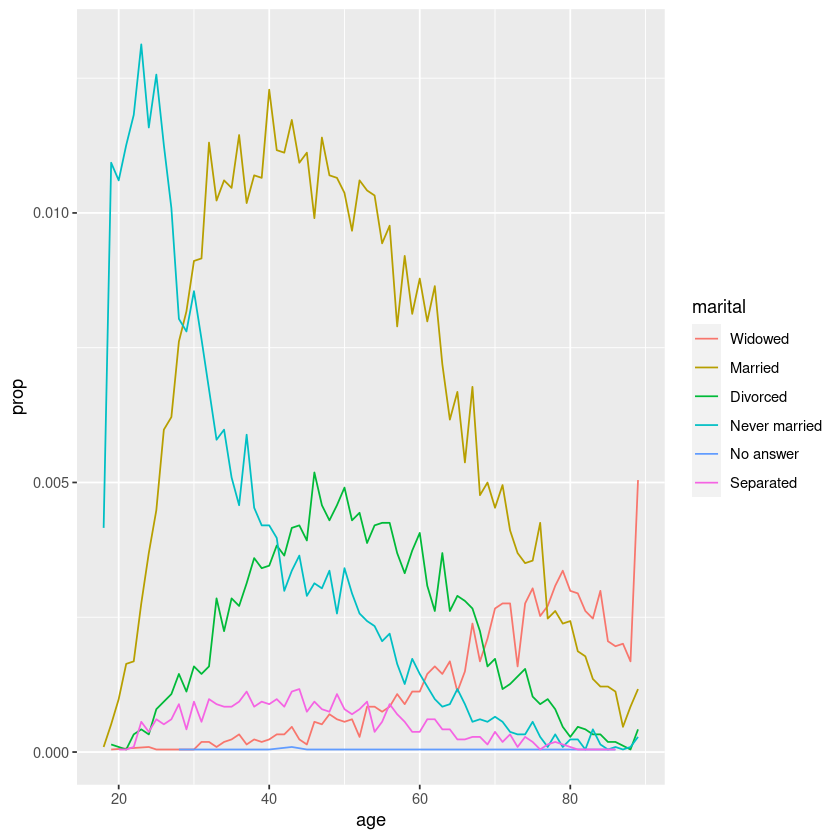

In [30]:
ggplot(by_age,
       aes(age, prop, color = fct_reorder2(marital, age, prop))) +
    geom_line() +
    labs(color = 'marital')

Finally, for bar plots, you can use `fct_infreq()` to order levels in
increasing frequency: this is the simplest type of reordering because
it doesn’t need any extra variables. You may want to combine with
`fct_rev()` :

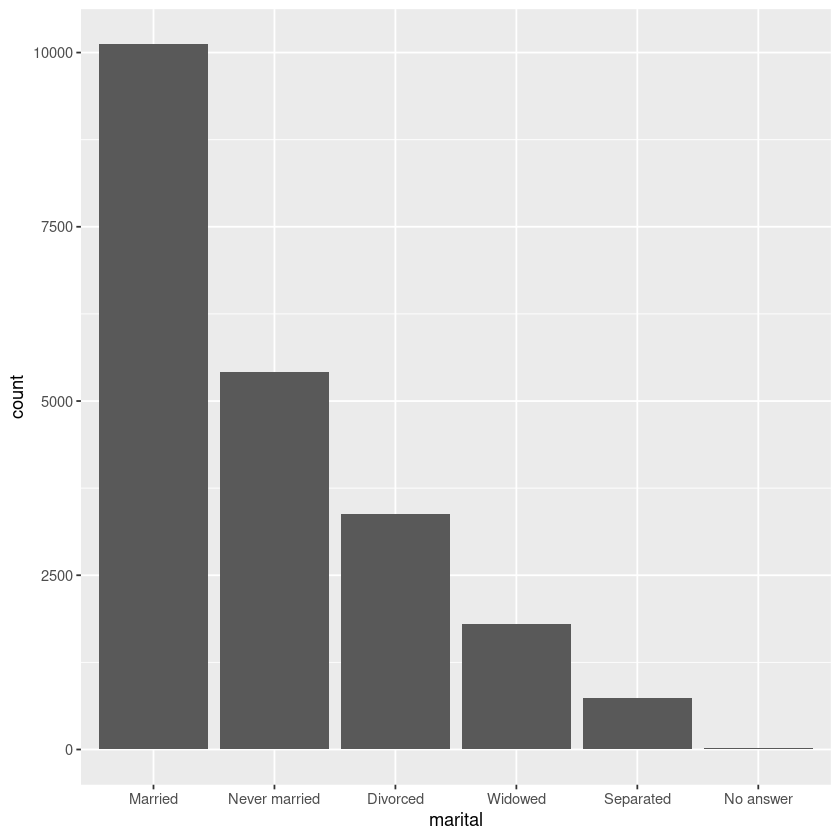

In [31]:
gss_cat %>%
    mutate(marital = marital %>% fct_infreq()) %>%
    ggplot(aes(marital)) +
        geom_bar()

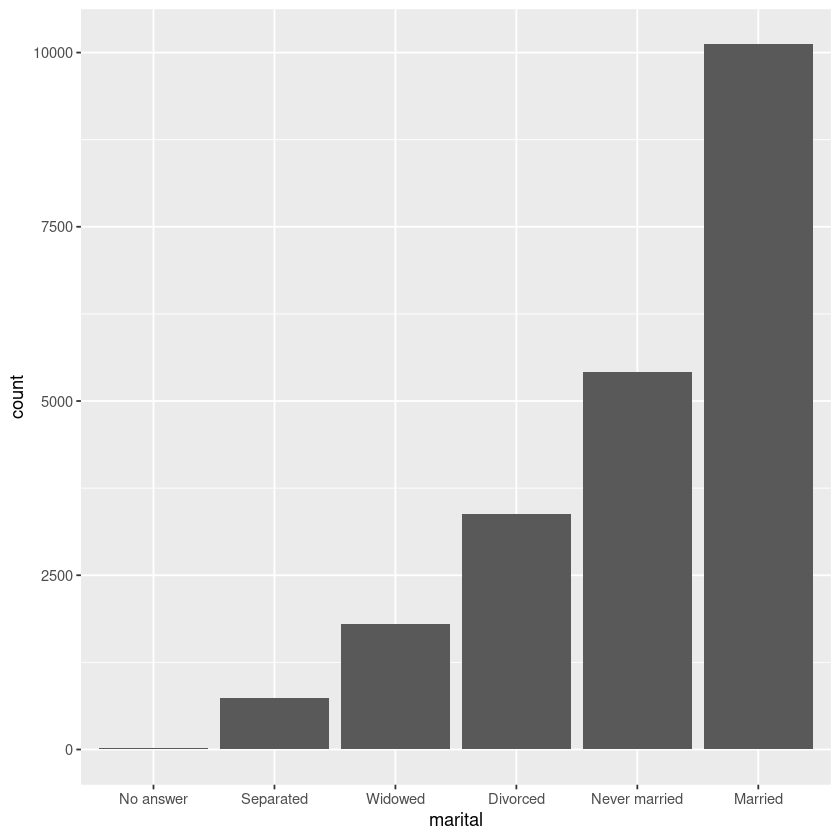

In [32]:
gss_cat %>%
    mutate(marital = marital %>% fct_infreq() %>% fct_rev()) %>%
    ggplot(aes(marital)) +
        geom_bar()

There are some suspiciously high numbers in tvhours. Is the mean a good summary?

In [33]:
summary(gss_cat[['tvhours']])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   1.000   2.000   2.981   4.000  24.000   10146 

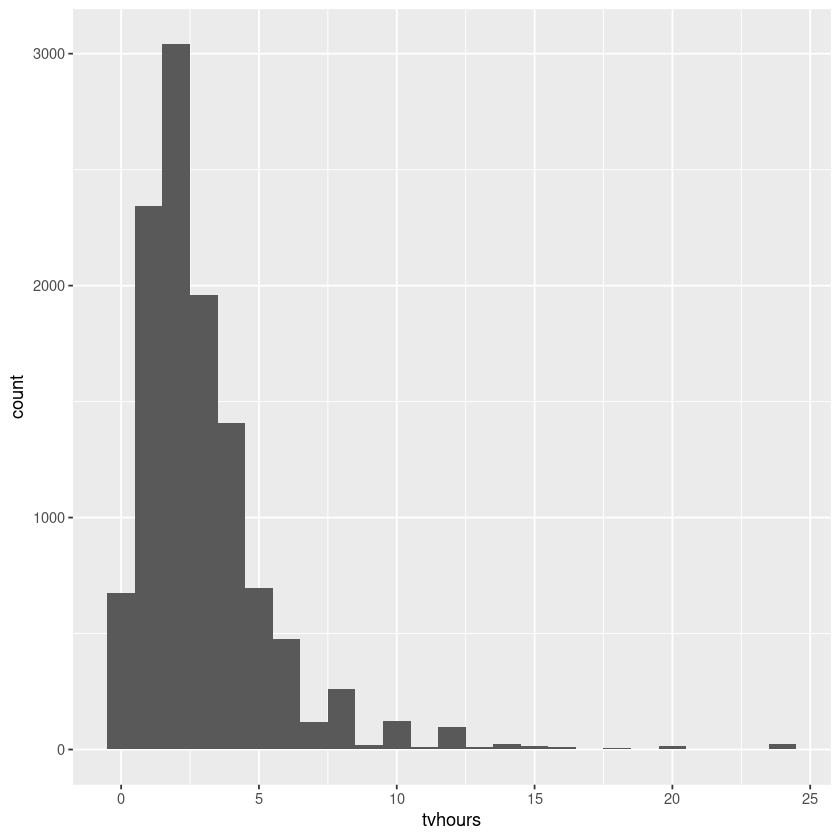

In [34]:
gss_cat %>%
    filter(!is.na(tvhours)) %>%
    ggplot(aes(tvhours)) +
        geom_histogram(binwidth = 1)

Whether the mean is the best summary depends on what you are using it for :-), i.e. your objective. But probably the median would be what most people prefer.

The levels of rincome are ordered in decreasing order of the income; however the placement of “No answer”, “Don’t know”, and “Refused” before, and “Not applicable” after the income levels is arbitrary. It would be better to place all the missing income level categories either before or after all the known values.

In [35]:
levels(gss_cat$rincome)

[1] "No answer"      "Don't know"     "Refused"        "$25000 or more"
 [5] "$20000 - 24999" "$15000 - 19999" "$10000 - 14999" "$8000 to 9999" 
 [9] "$7000 to 7999"  "$6000 to 6999"  "$5000 to 5999"  "$4000 to 4999" 
[13] "$3000 to 3999"  "$1000 to 2999"  "Lt $1000"       "Not applicable"

## __Modifying Factor Levels__

More powerful than changing the orders of the levels is changing
their values. This allows you to clarify labels for publication, and
collapse levels for high-level displays. The most general and powerful tool is `fct_recode()` .
It allows you to recode, or change, the
value of each level. For example, take `gss_cat$partyid` :

In [36]:
gss_cat %>%
    count(partyid)

partyid,n
<fct>,<int>
No answer,154
Don't know,1
Other party,393
⋮,⋮
"Ind,near dem",2499
Not str democrat,3690
Strong democrat,3490


The levels are terse and inconsistent. Let’s tweak them to be longer
and use a parallel construction:

In [37]:
gss_cat %>%
    mutate(partyid = fct_recode(partyid,
        'Republican, strong'    = 'Strong republican',
        'Republican, weak'      = 'Not str republican',
        'Independent, near rep' = 'Ind,near rep',
        'Independent, near dem' = 'Ind,near dem',
        'Democrat, weak'        = 'Not str democrat',
        'Democrat, strong'      = 'Strong democrat')) %>%
    count(partyid)

partyid,n
<fct>,<int>
No answer,154
Don't know,1
Other party,393
⋮,⋮
"Independent, near dem",2499
"Democrat, weak",3690
"Democrat, strong",3490


`fct_recode()` will leave levels that aren’t explicitly mentioned as is,
and will warn you if you accidentally refer to a level that doesn’t
exist.
To combine groups, you can assign multiple old levels to the same
new level:

In [38]:
gss_cat %>%
    mutate(partyid = fct_recode(partyid,
        'Republican, strong'    = 'Strong republican',
        'Republican, weak'      = 'Not str republican',
        'Independent, near rep' = 'Ind,near rep',
        'Independent, near dem' = 'Ind,near dem',
        'Democrat, weak'        = 'Not str democrat',
        'Democrat, strong'      = 'Strong democrat',
        'Other'                 = 'No answer',
        'Other'                 = 'Don\'t know',
        'Other'                 = 'Other party'
                               )
          ) %>%
    count(partyid)

partyid,n
<fct>,<int>
Other,548
"Republican, strong",2314
"Republican, weak",3032
⋮,⋮
"Independent, near dem",2499
"Democrat, weak",3690
"Democrat, strong",3490


If you want to collapse a lot of levels, `fct_collapse()` is a useful
variant of `fct_recode()` . For each new variable, you can provide a
vector of old levels:

In [39]:
gss_cat %>%
    mutate(partyid = fct_collapse(partyid,
                other = c('No answer', 'Don\'t know', 'Other party'),
                rep = c('Strong republican', 'Not str republican'),
                ind = c('Ind,near rep', 'Independent', 'Ind,near dem'),
                dem = c('Not str democrat', 'Strong democrat')
            )
           ) %>%
    count(partyid)

partyid,n
<fct>,<int>
other,548
rep,5346
ind,8409
dem,7180


Sometimes you just want to lump together all the small groups to
make a plot or table simpler. That’s the job of `fct_lump()` :

In [40]:
gss_cat %>%
    mutate(relig = fct_lump(relig)) %>%
    count(relig)

relig,n
<fct>,<int>
Protestant,10846
Other,10637


In [41]:
gss_cat %>%
    mutate(relig = fct_lump(relig, n = 10)) %>%
    count(relig, sort = TRUE) %>%
    print(n = Inf)

# A tibble: 10 x 2
   relig                       n
   <fct>                   <int>
 1 Protestant              10846
 2 Catholic                 5124
 3 None                     3523
 4 Christian                 689
 5 Other                     458
 6 Jewish                    388
 7 Buddhism                  147
 8 Inter-nondenominational   109
 9 Moslem/islam              104
10 Orthodox-christian         95


How have the proportions of people identifying as Democrat,
Republican, and Independent changed over time?

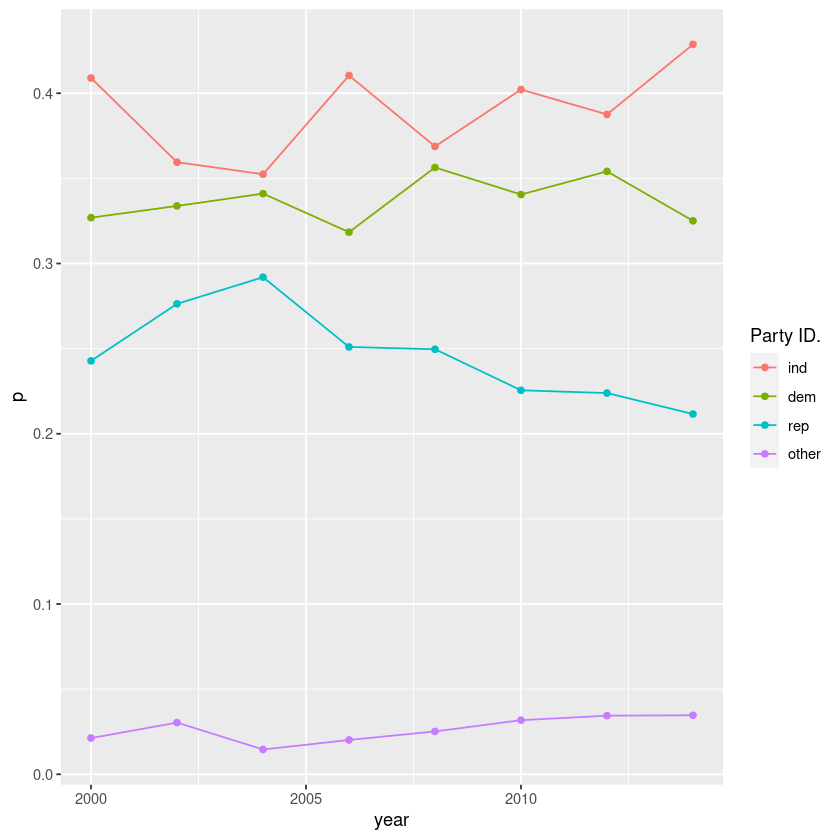

In [42]:
gss_cat %>%
  mutate(
    partyid =
      fct_collapse(partyid,
        other = c("No answer", "Don't know", "Other party"),
        rep = c("Strong republican", "Not str republican"),
        ind = c("Ind,near rep", "Independent", "Ind,near dem"),
        dem = c("Not str democrat", "Strong democrat")
      )
  ) %>%
  count(year, partyid) %>%
  group_by(year) %>%
  mutate(p = n / sum(n)) %>%
  ggplot(aes(
    x = year, y = p,
    colour = fct_reorder2(partyid, year, p)
  )) +
  geom_point() +
  geom_line() +
  labs(colour = "Party ID.")

How could you collapse rincome into a small set of categories?

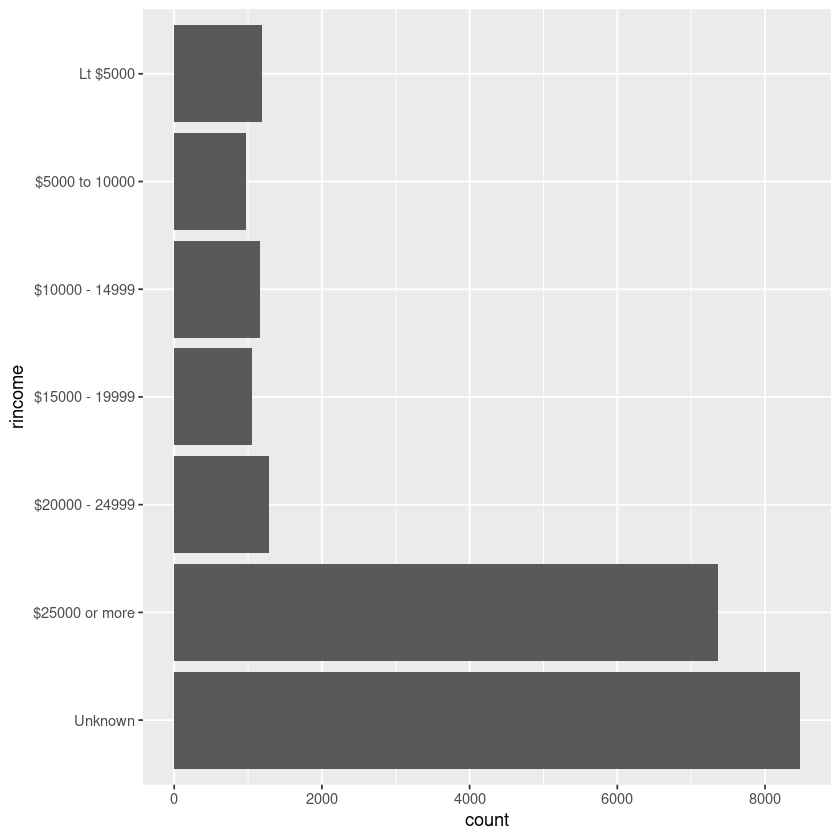

In [43]:
gss_cat %>%
  mutate(
    rincome =
      fct_collapse(
        rincome,
        `Unknown` = c("No answer", "Don't know", "Refused", "Not applicable"),
        `Lt $5000` = c("Lt $1000", str_c(
          "$", c("1000", "3000", "4000"),
          " to ", c("2999", "3999", "4999")
        )),
        `$5000 to 10000` = str_c(
          "$", c("5000", "6000", "7000", "8000"),
          " to ", c("5999", "6999", "7999", "9999")
        )
      )
  ) %>%
  ggplot(aes(x = rincome)) +
  geom_bar() +
  coord_flip()